### Тема: Компьютерное моделирование выборок непрерывных случайных величин, первичная обработка выборки

**Выполнил**: Лежнин Максим Витальевич (ПМ-31)

**Преподаватель**: Олейник Т.А., кафедра ВМ-1

###### Практическая работа № **3**, вариант № **3**

###### Осенний семестр, 2023 год

###### МИЭТ, Зеленоград

### Библиотеки

In [1]:
import numpy as np
import math
import scipy.stats as sts
import scipy.special as sc
import scipy.integrate as integrate
import matplotlib.pyplot as plt

### Задание 1
Сгенерируйте выборку объема 100 нормально распределенной случайной величины $X \sim N(m,\, \sigma)$ (параметры выберите самостоятельно).
- Постройте гистограммы относительных частот, используя при выборе числа интервалов группировки различные правила (квадратного корня, Райса, Стерджесса, Скотта и Фридмана – Диакониса). На каждую гистограмму наложите график теоретической плотности распределения. Визуально сопоставьте качество «представления» теоретической плотности распределения с помощью гистограммы при использовании различных правил. Сгенерируйте новую выборку и повторите задание.
- Сгенерируйте выборки объемов 20, 50, 150, 200, 500, 1000 и для каждой из них постройте гистограмму относительных частот и график теоретической плотности распределения. При построении гистограмм используйте одно и то же правило выбора интервалов группировки (любое). Какие закономерности можно подметить? Иллюстрацией какого теоретического утверждения служат полученные рисунки?

Напишем парочку функций для вычисления характеристик выборки и визуализации с помощью гистограмм

In [2]:
# среднее выборки
def sample_mean(sample):
    return sum(sample) / len(sample)

# среднеквадратическое отклонение
def sample_standart_deviation(sample, corrected = 0):
    mean = sample_mean(sample)
    list_of_squares = [(i - mean)**2 for i in sample]
    return np.sqrt(sum(list_of_squares) / (len(sample) - int(bool(corrected))))

# промежутки в зависимости от метода
def hist_bins(sample, method):
    # размер выборки
    sample_size = len(sample)
    
    # выбор метода
    match method:
        case 1:
            number_of_intervals = 1 + math.ceil(np.log2(sample_size))
            title = "Правило Стёрджеса"
        
        case 2:
            number_of_intervals = math.ceil(np.sqrt(sample_size))
            title = "Правило квадратного корня"

        case 3:
            number_of_intervals = math.ceil(2 * np.cbrt(sample_size))
            title = "Правило Райса"

        case 4:
            bin_width = 3.49 * sample_standart_deviation(sample)/ np.cbrt(sample_size)
            title = "Правило Скотта"

        case 5:
            bin_width = 2 * sts.iqr(sample) / np.cbrt(sample_size)
            title = "Правило Фридмана-Диакониса"
        
        case _:
            print("""Неизвестный метод! Методы:\n
            1: Правило Стёрджеса\n
            2: Правило квадратного корня\n
            3: Правило Райса\n
            4: Правило Скотта
            5: Правило Фридмана-Диакониса""")
            return -1

    # получаем промежутки
    if method < 4:
        bins = np.linspace(min(sample), max(sample), number_of_intervals + 1)
    else:
        bins = np.arange(min(sample), max(sample) + bin_width, bin_width)

    return (title, bins)


# визуализация гистограммы относительных частот
def visualize_sample_pdf(sample, title, bins):
    plt.hist(sample, bins=bins, edgecolor='white', density=True, alpha=0.5, color='b', 
             label="эмпирическое")
    plt.title(title + f". Размер выборки: {len(sample)}")
    plt.grid(True)

Сгенерируем и визаулизируем всеми методами две выборки

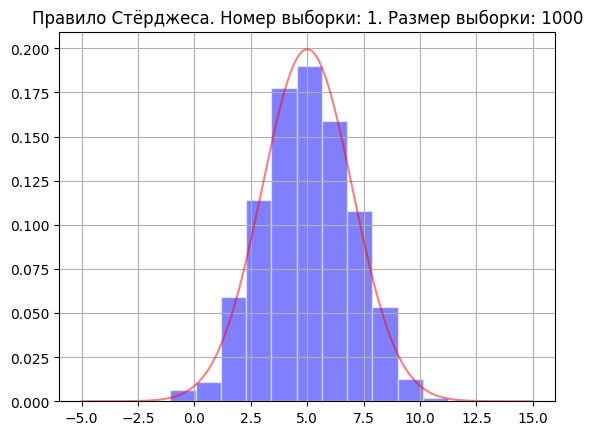

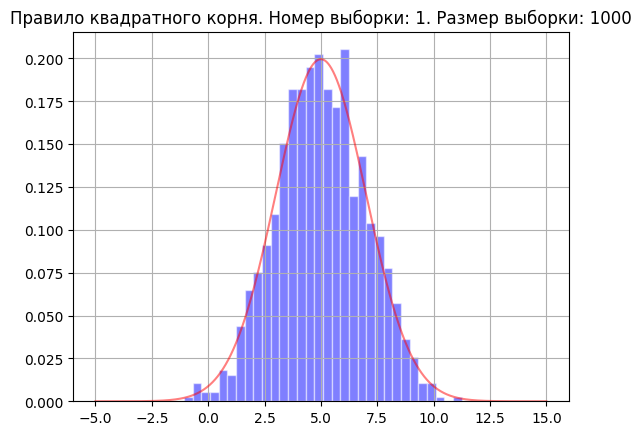

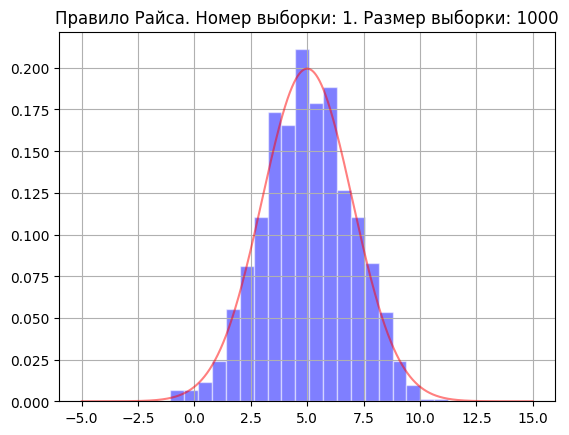

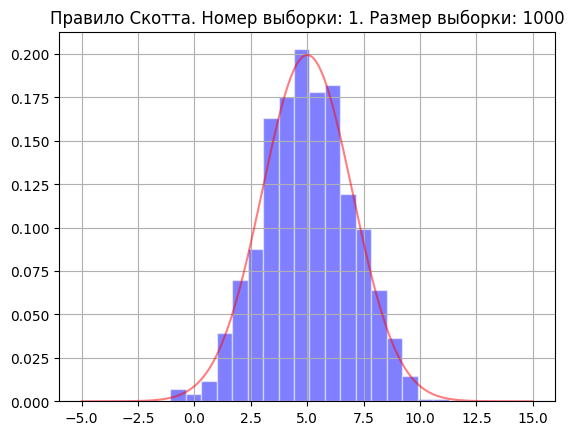

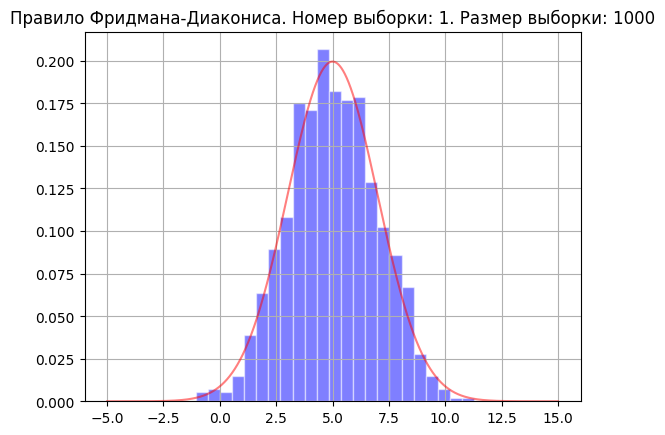

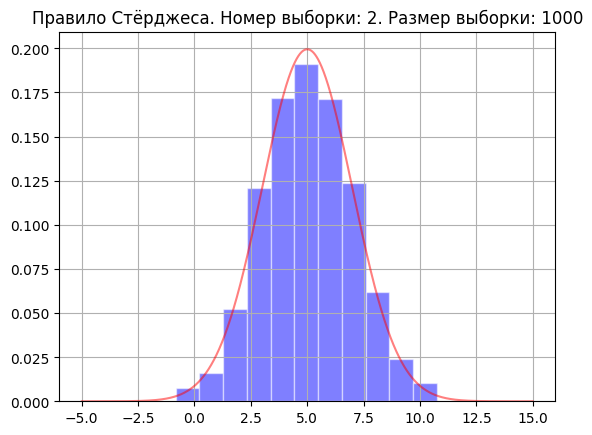

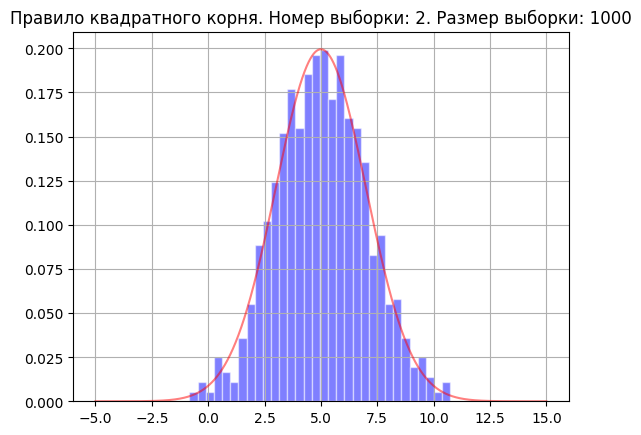

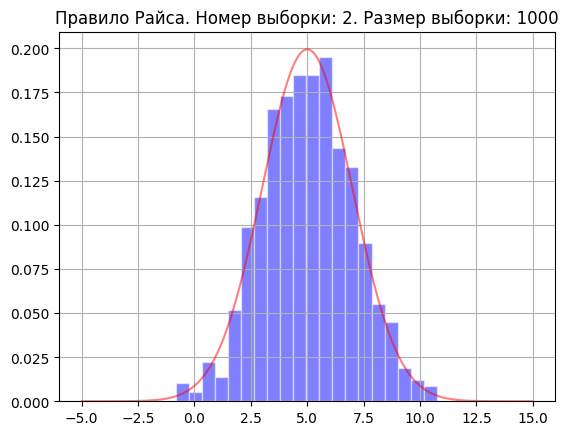

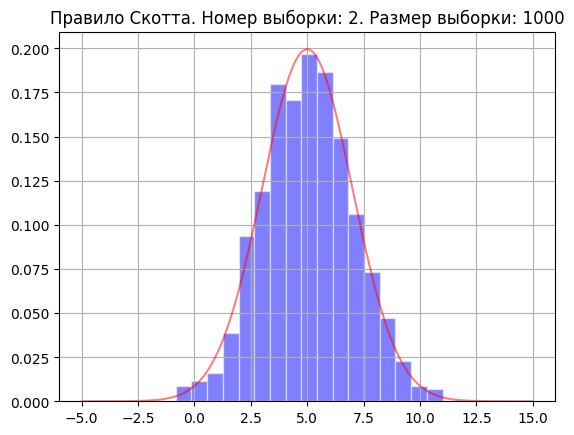

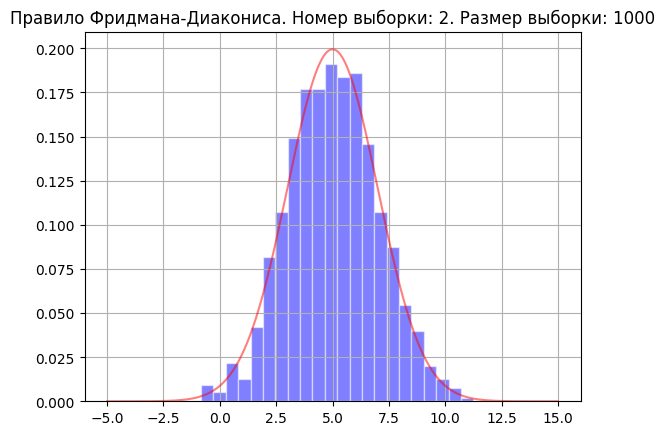

In [3]:
# параметры нормального распределения
m = 5
sig = 2

# теоретическое распределение
normal_distribution = sts.norm(m, sig)

# размер выборки
sample_size = 1000

# генерируем выборку 2 раза
for i in range(2):
    # выборка
    sample = np.random.normal(m, sig, sample_size)

    # проверяем каждый метод группировки
    for method in range(1, 6):
        plt.figure()
        
        (title, bins) = hist_bins(sample, method)
        title += f". Номер выборки: {i + 1}"
        visualize_sample_pdf(sample, title, bins)

        # визуализируем теоретическую плотность
        x = np.linspace(m - 5 * sig, m + 5 * sig, 10000)
        plt.plot(x, normal_distribution.pdf(x), color='r', alpha=0.5)

Визуально наиболее качественным методом кажется правило Стёрджеса. Далее правила Скотта и Райса. 

Ранее мы сгенерировали 2 выборки и рассмотрели все способы группировки, но выборки были одного размера. Теперь сгенерируем выборки разных размеров, но разбивать на промежутки будем одним методом (пусть по правилу Стёрджеса):

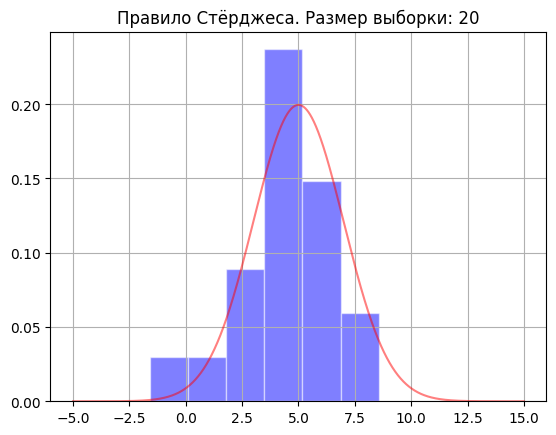

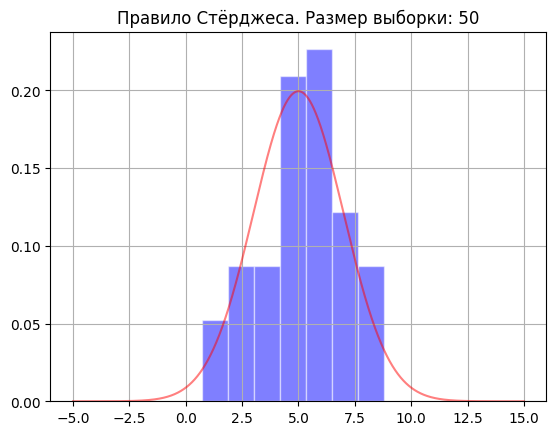

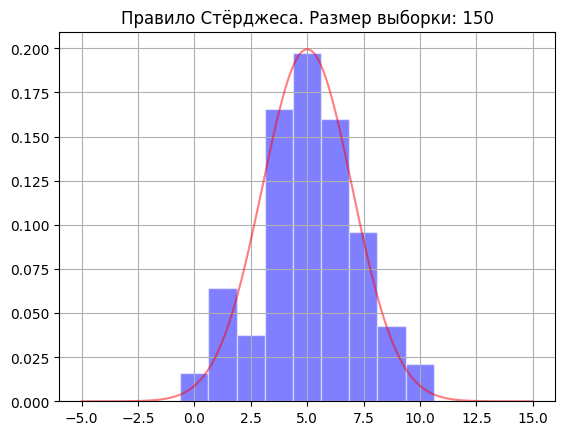

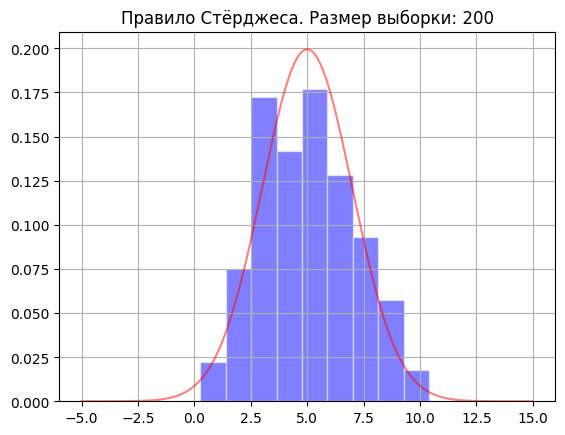

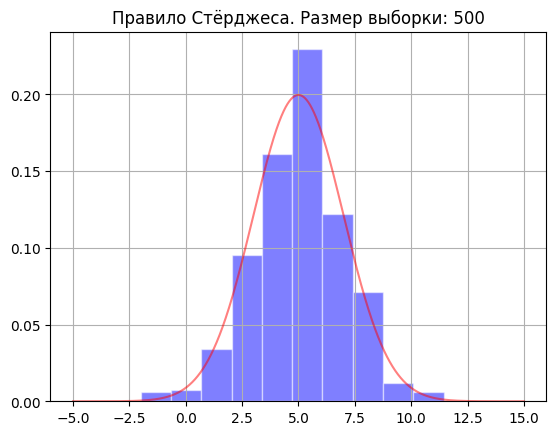

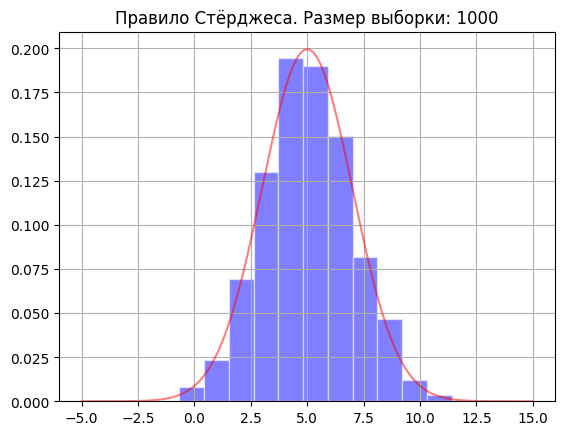

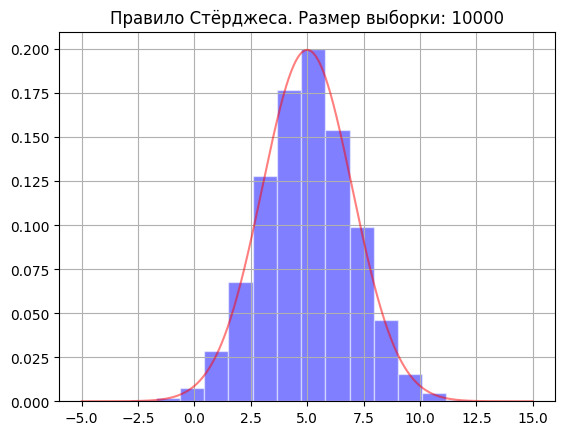

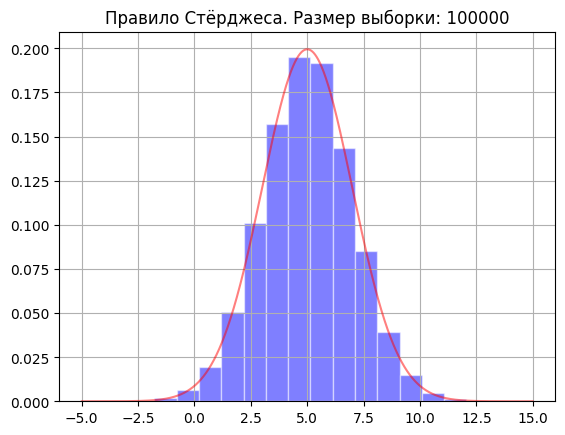

In [4]:
# теоретическое распределение
normal_distribution = sts.norm(m, sig)

# размер выборки
sample_sizes = [20, 50, 150, 200, 500, 1000, 10000, 100000]

# смотрим разные размеры выборки
for sample_size in sample_sizes:
    plt.figure()
    
    # выборка
    sample = np.random.normal(m, sig, sample_size)
    
    # визуализируем правило Стрёрджеса
    (title, bins) = hist_bins(sample, 1)
    visualize_sample_pdf(sample, title, bins)
    
    # визуализируем теоретическую плотность
    x = np.linspace(m - 5 * sig, m + 5 * sig, 10000)
    plt.plot(x, normal_distribution.pdf(x), color='r', alpha=0.5)

Чем больше размер выборки, тем больше гистограмма относительных частот повторяет теоретическую плотность вероятности. Об этом утверждает закон больших чисел.

### Задание 2
Используя метод обратных функций, сформируйте несколько выборок (разных объемов) случайной величины X, распределенной по показательному закону с параметром $\lambda$. Для каждой выборки постройте график эмпирической функции распределения и теоретической функции распределения величины X (в одной системе координат). Прокомментируйте полученные рисунки.

Пусть $X \sim Ex(\lambda)$ распределена по показательному закону. Закон распределения:
$$F_X(x) = 1 - e^{-\lambda x}$$
Пусть $Y \sim R(0, 1)$ распределена равномерно, причем $Y = F_X(X) = 1 - e^{-\lambda X}$. Заметим, что $F_X$ строго монотонная функция, следовательно существует обратная. А значит:
$$X = F_X^{-1}(Y) = -\frac{1}{\lambda}\ln{(1 - Y)}$$

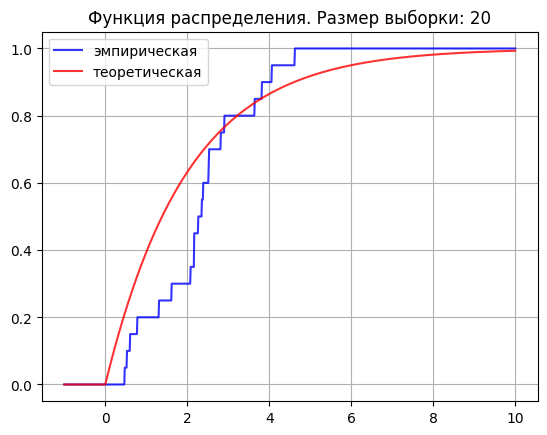

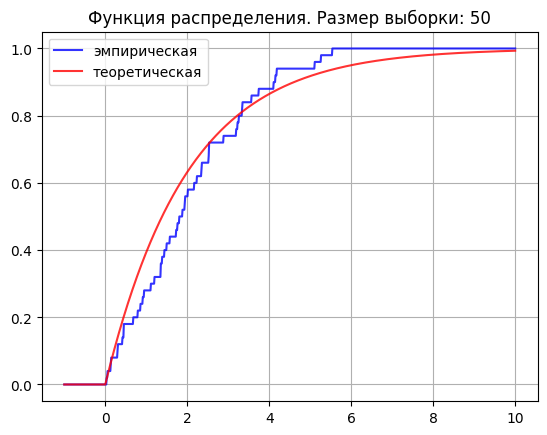

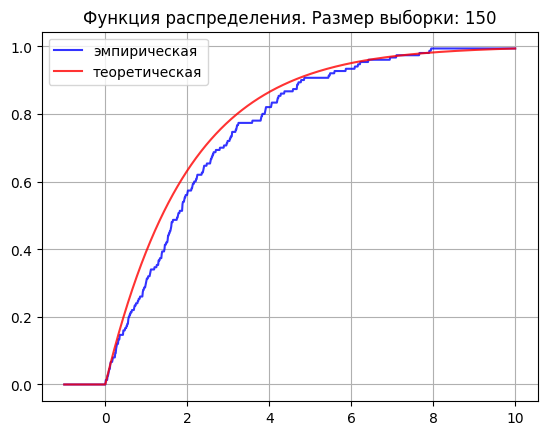

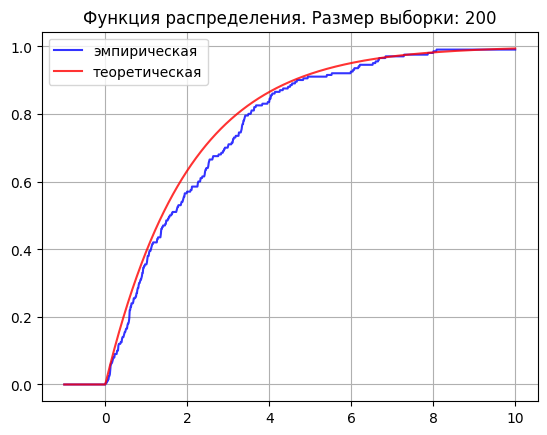

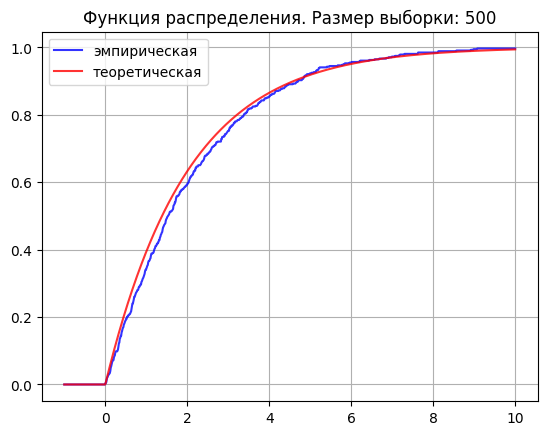

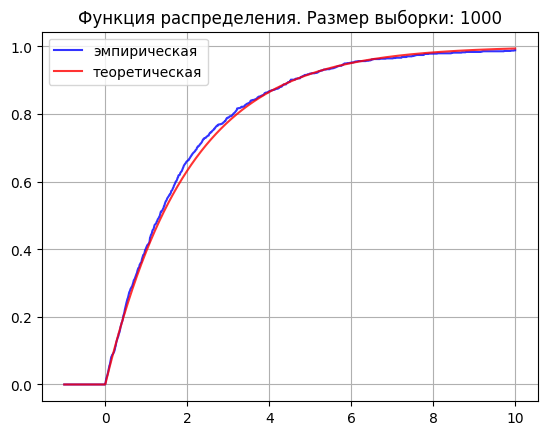

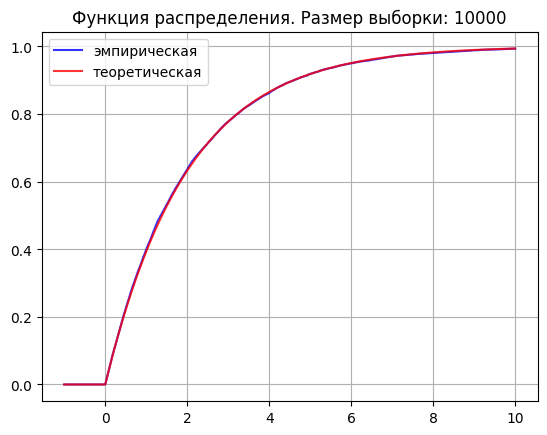

In [5]:
# параметр показательного распределения
lm = 0.5

# размеры выборки
sample_sizes = [20, 50, 150, 200, 500, 1000, 10000]

# смотрим функции распределения при разных размерах выборки
for sample_size in sample_sizes:
    # равномерное распределение
    Y = np.random.uniform(0, 1, sample_size)

    # получаем выборку показательного распределения с помощью обратной функции
    X = [-np.log(1 - i) / lm for i in Y]

    # отрезок, на котором будем сравнивать функции распределения
    x = np.linspace(-1, 1 / lm + 8, 1000)

    # функция распределения выборки и лист ее значений на отрезке
    stat_cdf = lambda x: sum(int(i < x) for i in X) / len(X)
    list_cdf = [stat_cdf(i) for i in x]
    
    # теоретическое показательное распределение
    expon_distribution = sts.expon(0, 1 / lm)

    # визуализация
    plt.figure()
    
    # визуализируем функцию от выборки
    plt.plot(x, list_cdf, color='b', label='эмпирическая', alpha=0.8)
    
    #визуализируем теоретическую функцию распределения
    plt.plot(x, expon_distribution.cdf(x), color='r', label='теоретическая', alpha=0.8)

    # параметры визуализации
    plt.title(f"Функция распределения. Размер выборки: {sample_size}")
    plt.legend()
    plt.grid(True)

С ростом размера выборки эмпирический закон распределения начинает точнее повторять теоертический и при размере 10000 уже почти неотличим.

### Задание 3
Сгенерируйте выборку объема 100 случайной величины X, распределенной по показательному закону с параметром $\lambda$ (значение параметра выберите самостоятельно). Рассчитайте число интервалов группировки по различным правилам. Для каждого случая оцените качество представления теоретической плотности распределения гистограммой (в качестве показателя оценки возьмите максимальное по модулю отклонение гистограммы от теоретической плотности). Для какого правила получился лучший по точности результат? Расставьте правила «по рейтингу» точности. Сгенерируйте несколько новых выборок и повторите расчеты. Можно ли сказать, что рейтинг устойчив?

In [6]:
# функция плотности выборки на заданной группировке
def stat_pdf(x, bins, sample):
    # вне заданных промежутков плотность 0
    if x > max(bins) or x < min(bins):
        return 0

    # определяем частоту
    freq = 0

    # цикл для просмотра всех промежутков
    for i in range(len(bins) - 1):
        # если мы нашли нужный промежуток
        if bins[i] <= x < bins[i + 1]:
            # цикл для подсчета значений выборки, попавших в найденный промежуток
            for var in sample:
                # если конкретное значение выборки попалов в интервал
                if bins[i] <= var < bins[i + 1]:
                    freq += 1
                freq /= len(sample)
            return freq

    return 0

# функция получения максимальной ошибки на заданной группировке
def max_error(lm, bins, sample, eps=10**5):
    # теоретическое показательное распределение
    distribution = sts.expon(0, 1 / lm)
    
    # определеяем максимальное отклонение
    max_error = 0

    # максимальная ошибка всегда будет на концах промежутков
    # поэтому рассматриваем цикл всех концов
    for i in range(len(bins) - 2):
        # получаем две частоты (на границах двух столбиков рассматриваем оба)
        freq_1 = stat_pdf(bins[i + 1] - eps, bins, sample)
        freq_2 = stat_pdf(bins[i + 1] + eps, bins, sample)

        # теоретическая плотность
        pdf = distribution.pdf(bins[i + 1])

        # выбираем наибольшую погрешность из наших частот
        error = max(abs(freq_1 - pdf), abs(freq_2 - pdf))

        if error > max_error:
            max_error = error

    return max_error

In [7]:
# параметр показательного распределения
lm = 0.5

# размер выборки
sample_size = 1000

# генерируем 10 выборок
for i in range(10):
    # создаем выборку
    X = np.random.exponential(1 / lm, sample_size)

    # создаем лист максимальных погрешностей
    max_errors = []

    # рассматриваем все описанные ранее методы
    for method in range(1, 6):
        # пользуемся старой функцией для получения промежутков
        title, bins = hist_bins(X, method)

        # находим максимальную ошибку и записываем в лист 
        # пару (значение_ошибки, название_метода)
        max_errors.append((max_error(lm, bins, X), title))

    # сортируем лист по возрастанию ошибки
    max_errors.sort(key=lambda x: x[0])

    # выводим рейтинг на экран
    print("Рейтинг (по точности):\n")
    for j in range(1, 6):
        print(f"{j}. {max_errors[j - 1][1]}. Ошибка: {max_errors[j - 1][0]}\n")
    print("\n")

Рейтинг (по точности):

1. Правило Стёрджеса. Ошибка: 0.2716209014298535

2. Правило Скотта. Ошибка: 0.3491137096835569

3. Правило Райса. Ошибка: 0.3573685630278657

4. Правило Фридмана-Диакониса. Ошибка: 0.4007282676127404

5. Правило квадратного корня. Ошибка: 0.4052548403225915



Рейтинг (по точности):

1. Правило Стёрджеса. Ошибка: 0.2319648120997227

2. Правило Райса. Ошибка: 0.32767442845996975

3. Правило Скотта. Ошибка: 0.3503135418520267

4. Правило квадратного корня. Ошибка: 0.3838856864996639

5. Правило Фридмана-Диакониса. Ошибка: 0.39743418397658675



Рейтинг (по точности):

1. Правило Стёрджеса. Ошибка: 0.26585272054988884

2. Правило Скотта. Ошибка: 0.35128676565637446

3. Правило Райса. Ошибка: 0.35324694084928465

4. Правило квадратного корня. Ошибка: 0.4023961704400023

5. Правило Фридмана-Диакониса. Ошибка: 0.4039146109609206



Рейтинг (по точности):

1. Правило Стёрджеса. Ошибка: 0.23505702257918268

2. Правило Райса. Ошибка: 0.3300958792746736

3. Правило Скотт

В результате 10 проверок можно четко выделить первое место:
- Правило Стёрджеса

На 2 и 3 места претендуют:
- Правило Райса
- Правило Скотта

На оставшиеся два места остаются:
- Правило квадратного корня
- Правило Фридмана-Диакониса

### Задание 4
Опираясь на утверждение центральной предельной теоремы, сформируйте выборку объема N случайной величины, закон распределения которой близок к нормальному. Для компьютерного моделирования используйте выборки генеральной случайной величины X, для генерации этих выборок используйте готовые средства, реализованные в языке программирования Python.

Задание выполните для выборок различных объемов N. Для каждого N результаты визуализируйте, построив гистограмму относительных частот. На гистограмму наложите график теоретической плотности распределения. Проанализируйте результаты.

Вариант 3: X имеет распределение хи-квадрат.

#### Центральная предельная теорема:

Пусть $X_1,\ ...,\ X_n,\ ...$ есть бесконечная последовательность независимых одинаково распределенных случайных величин, имеющих конечное математическое ожидание $\mu$ и среднеквадратичное отклонение $\sigma$. Также, пусть $S_n = \sum\limits_{k = 1}^n X_k$. Тогда:
$$\frac{S_n - \mu n}{\sigma \sqrt{n}} \to N(0,\, 1) \text{, при } n \to \infty$$

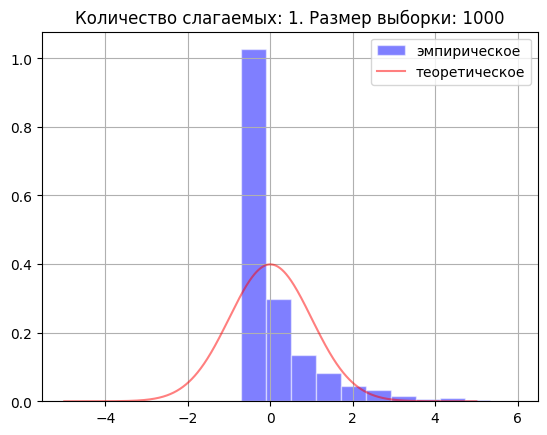

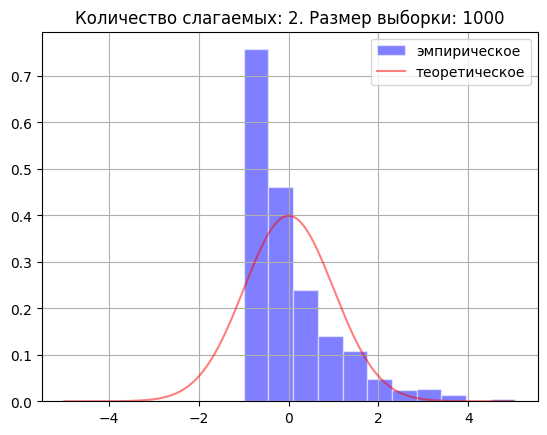

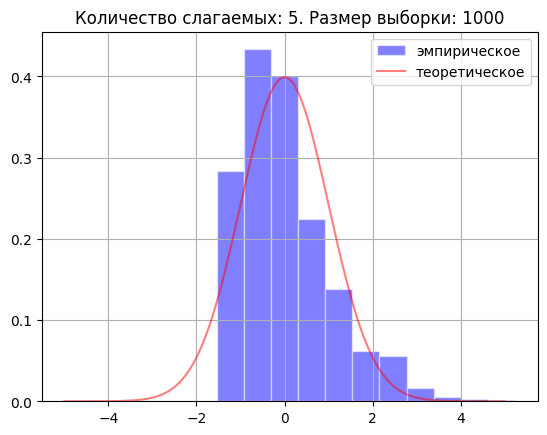

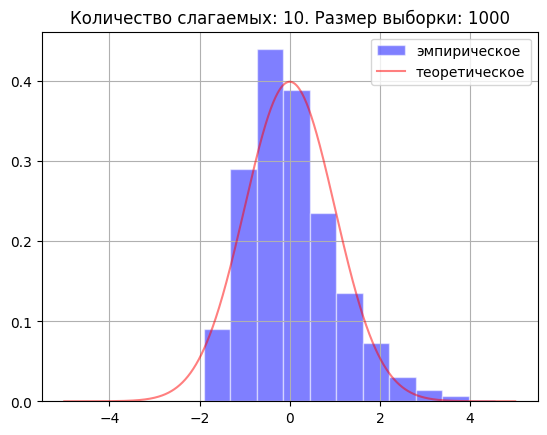

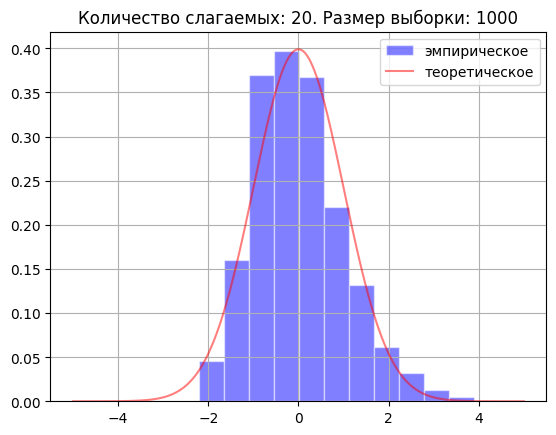

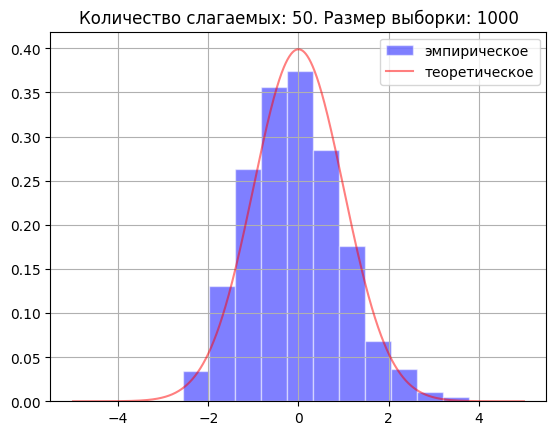

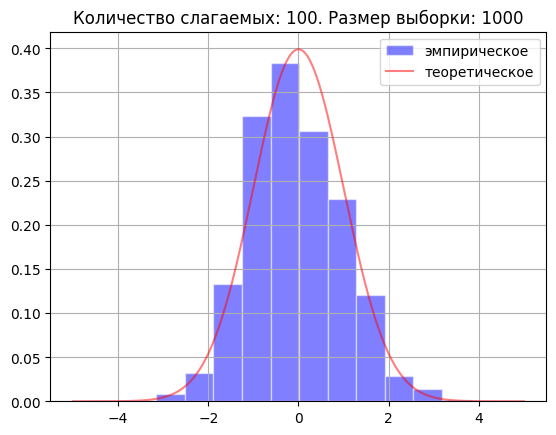

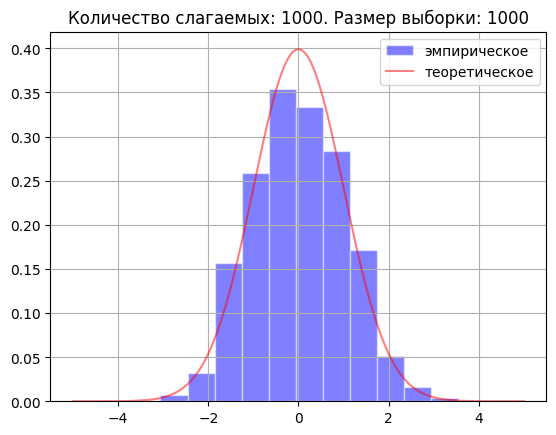

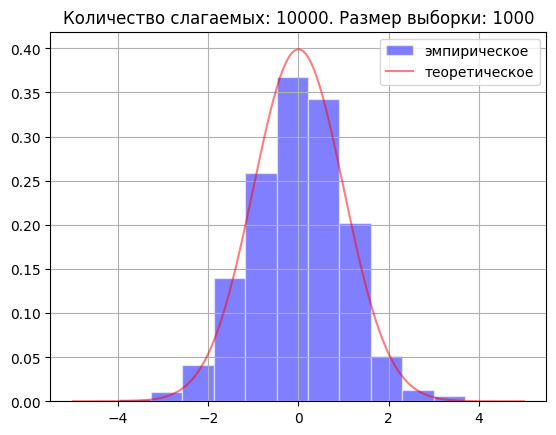

In [11]:
# параметр распределения хи-квадрат
df = 1

# распределение хи-квадрат
distribution = sts.chi2(df)

# характеристики распределения
mu = distribution.mean()
sigma = distribution.std()

# количество случайных величин
num_of_vars = 10000

# количество реализаций случайной величины
num_of_realisations = 1000

# набор выборок
random_variables = [np.random.chisquare(df, num_of_realisations) 
                    for i in range(num_of_vars)]

# количество слагаемых из выборки хи-квадрат
num_of_terms = [1, 2, 5, 10, 20, 50, 100, 1000, 10000]

# смотрим выборки разных размеров
for n in num_of_terms:
    S_n = [sum([random_variables[i][j] for i in range(n)]) 
           for j in range(num_of_realisations)]
    
    # новая случайная величина с распределением близким к нормальному N(0, 1)
    Y = [(S_n[i] - mu * n) / (sigma * np.sqrt(n)) for i in range(num_of_realisations)]

    # визуализируем новую выборку
    plt.figure()
    (title, bins) = hist_bins(Y, 1)
    title = f"Количество слагаемых: {n}"
    visualize_sample_pdf(Y, title, bins)

    # визуализируем теоретическое распределение N(0, 1)
    th_distribution = sts.norm(0, 1)
    x = np.linspace(-5, 5, 1000)
    plt.plot(x, th_distribution.pdf(x), color='r', alpha=0.5, label='теоретическое')
    plt.legend()

Мы "пронормировали" случайные выборки распределенные по закону хи-квадрат и полученная выборка действительно описывается нормальным законом при увеличении количества слагаемых.